In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# load the csv dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Check number of rows and columns
print(train_df.shape)
print(test_df.shape)

(2000, 21)
(1000, 21)


In [ ]:
# check duplicated values
train_df.duplicated().sum()

np.int64(0)

In [ ]:
test_df.duplicated().sum()

np.int64(0)

In [ ]:
#check null values
train_df.isnull().sum().any()

np.False_

In [ ]:
test_df.isnull().sum().any()

np.False_

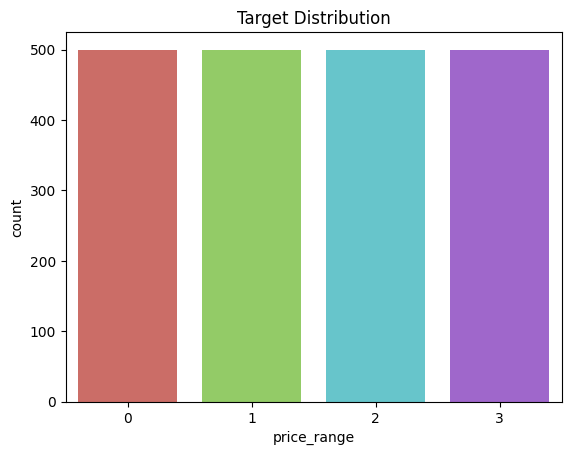

In [ ]:
# EDA ->
# Traget Distribution
sns.countplot(data = train_df, x ='price_range',palette='hls')
plt.title('Target Distribution')
plt.show()

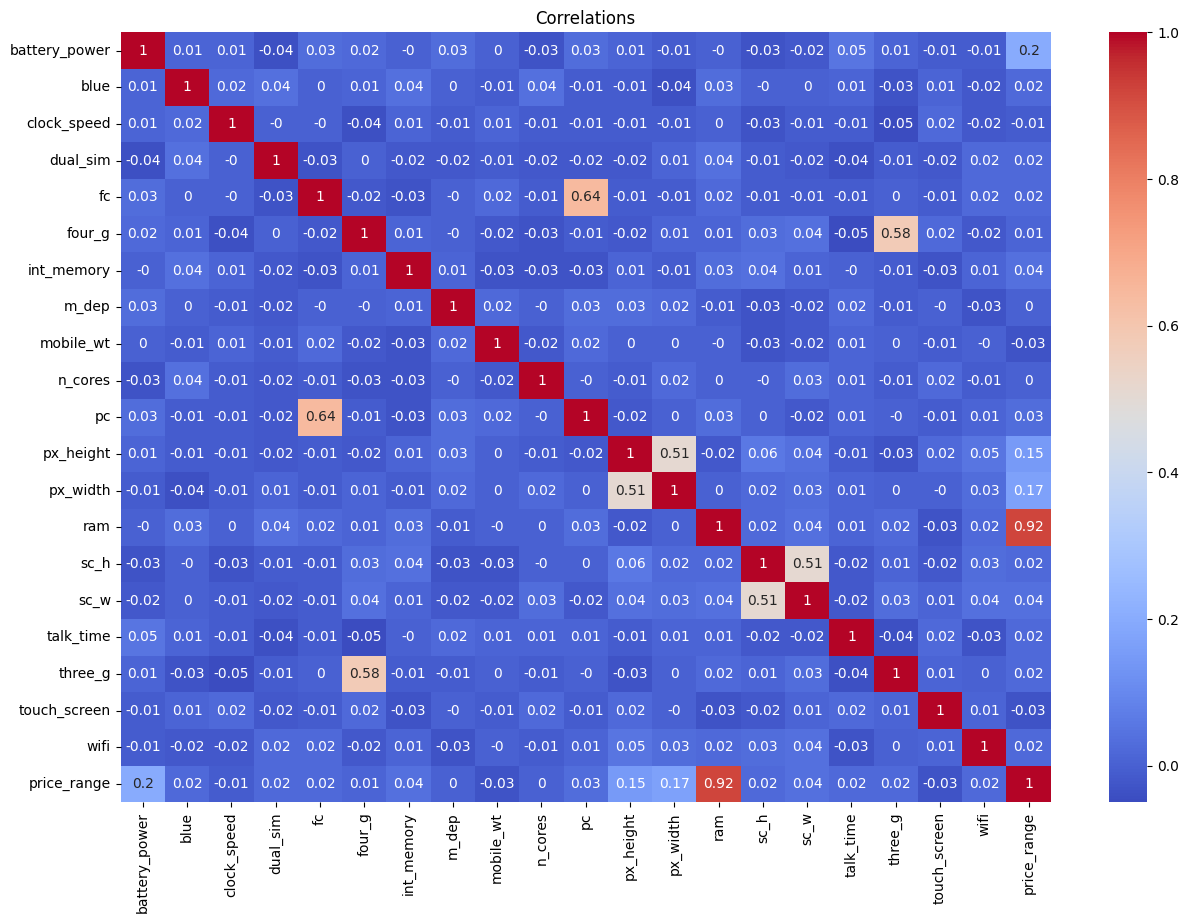

In [ ]:
# Correlations
plt.figure(figsize=(15,10))
corr = train_df.corr().round(2)
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title('Correlations')
plt.show()

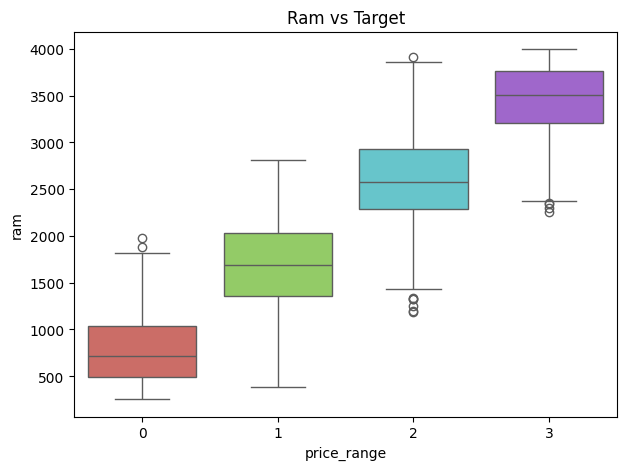

In [ ]:
# Important numeric features vs target
plt.figure(figsize=(7,5))
sns.boxplot(x='price_range',y='ram',data=train_df,palette='hls')
plt.title('Ram vs Target')
plt.show()

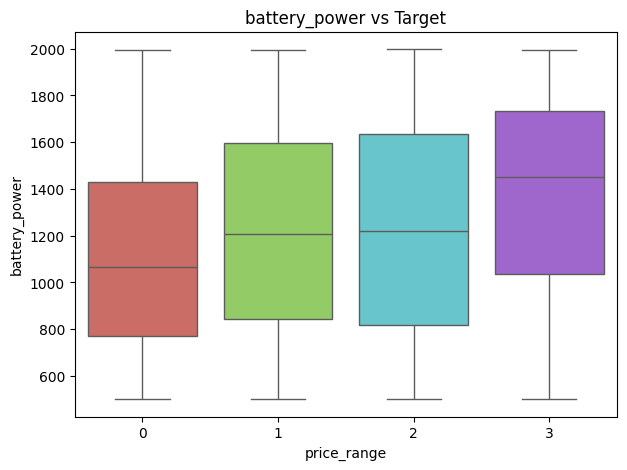

In [ ]:
# Important numeric features vs target
plt.figure(figsize=(7,5))
sns.boxplot(x='price_range',y='battery_power',data=train_df,palette='hls')
plt.title('battery_power vs Target')
plt.show()

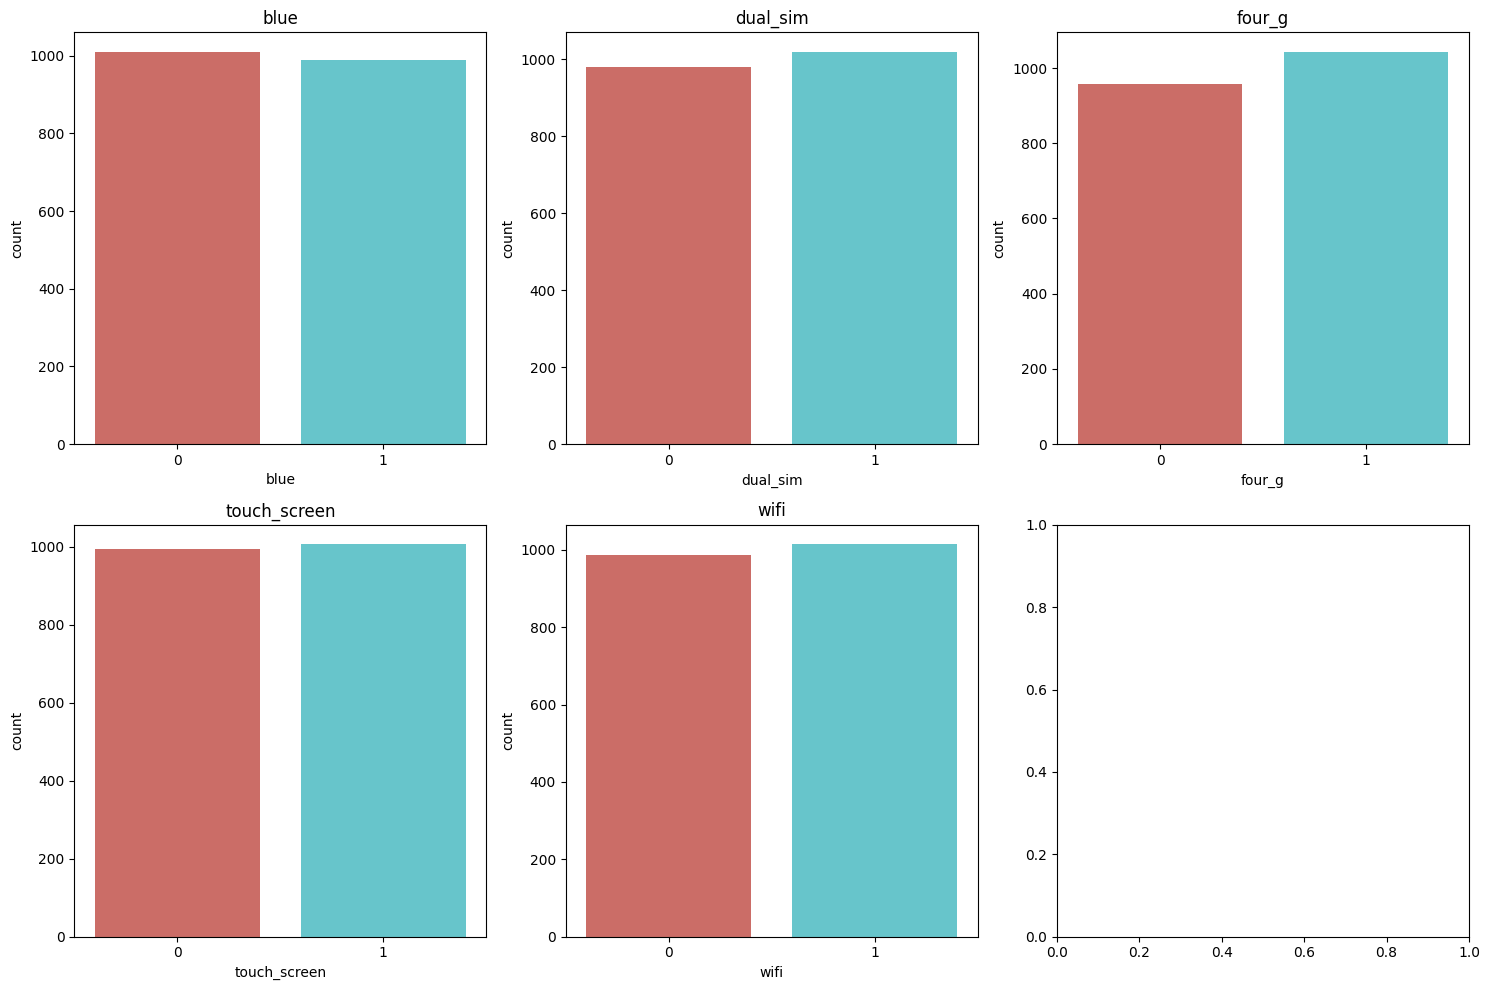

In [ ]:
# Binary Features
binary_features =['blue','dual_sim','four_g','touch_screen','wifi']
fig,axes = plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()
for i,f in enumerate(binary_features):
    sns.countplot(x=f,data=train_df,palette='hls',ax=axes[i])
    axes[i].set_title(f)
plt.tight_layout()
plt.show()

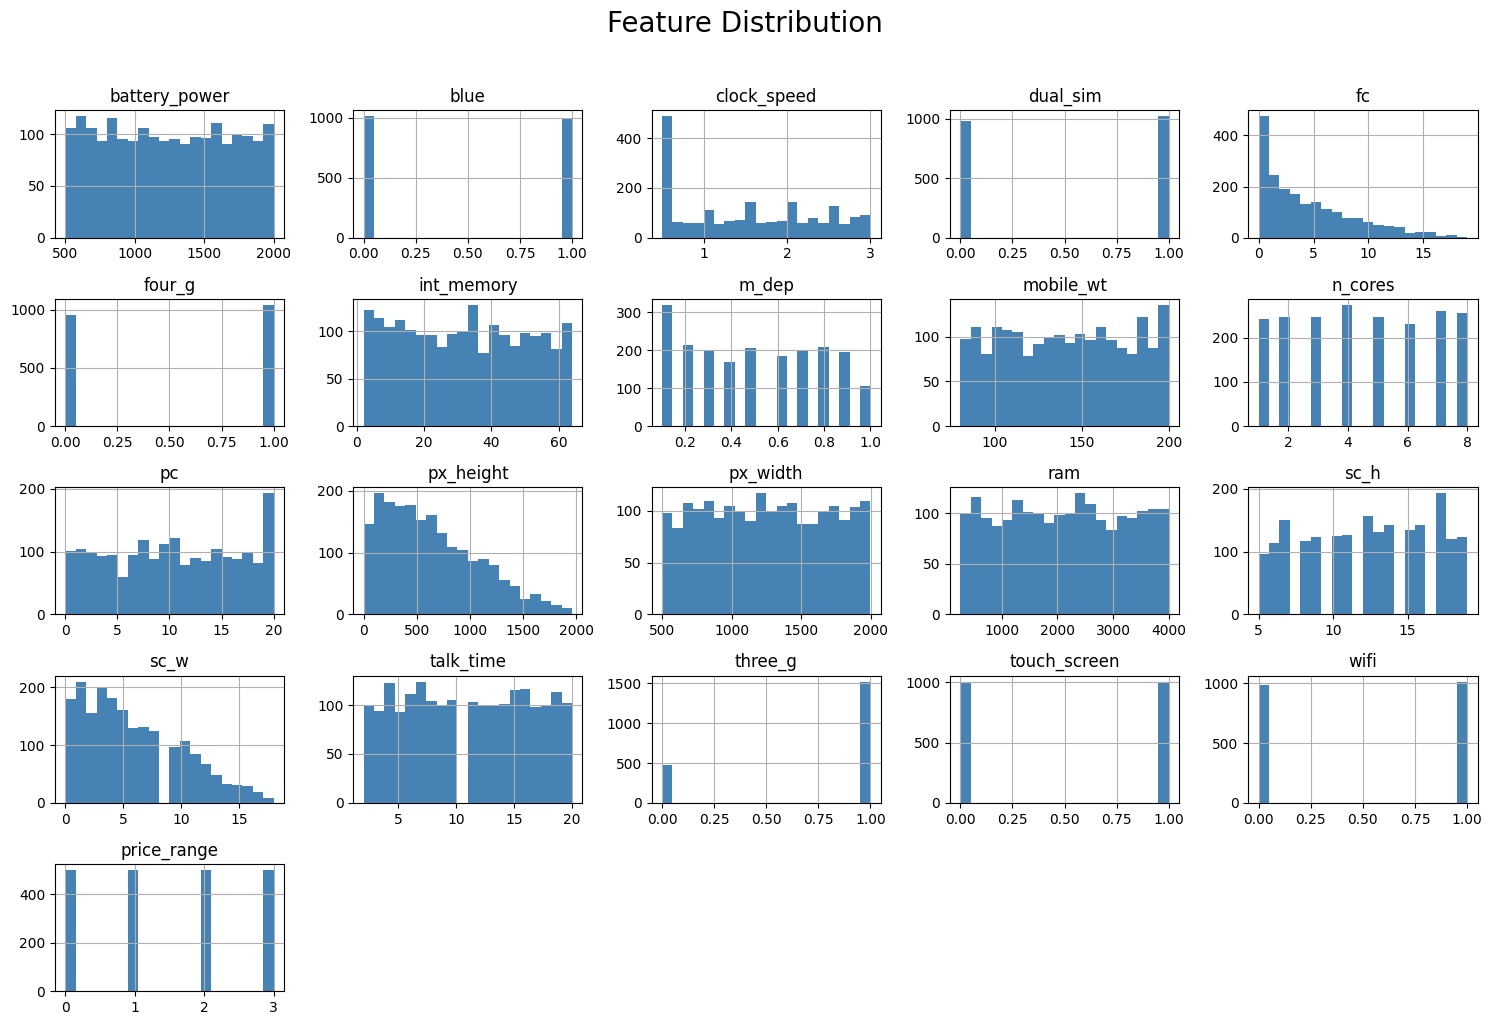

In [ ]:
# Feature distribution
train_df.hist(bins=20,figsize=(15,10),color ='steelblue')
plt.suptitle('Feature Distribution',y=1.02,fontsize=20)
plt.tight_layout()
plt.show()

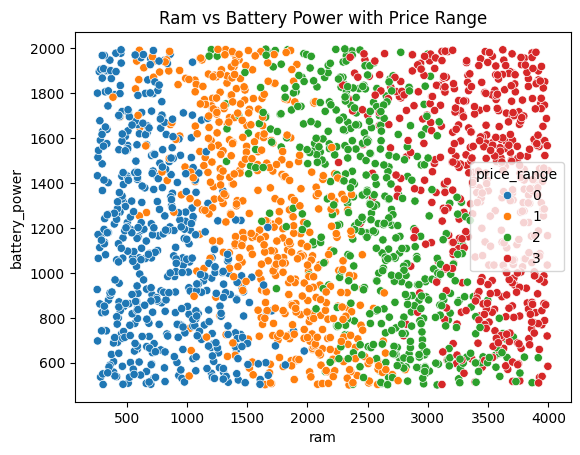

In [ ]:
#Scatter plot
sns.scatterplot(x='ram',y='battery_power',data=train_df,hue='price_range',palette='tab10')
plt.title('Ram vs Battery Power with Price Range')
plt.show()

In [ ]:
# Target columns
X = train_df.drop('price_range',axis=1)
y = train_df['price_range']

In [ ]:
# Scaleing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_final = scaler.transform(test_df.drop('id',axis=1))

In [ ]:
#Split the data
X_train,X_val,y_train,y_val = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Basic ML Model
print('Logistic Regression')
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_val)
print('Accuracy Score: ',np.round(accuracy_score(y_val,y_pred),3))

Logistic Regression
Accuracy Score:  0.965


In [ ]:
# Basic ML Model
print('Logistic Regression')
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_val)
print('Accuracy Score: ',np.round(accuracy_score(y_val,y_pred),3))

Logistic Regression
Accuracy Score:  0.882


In [ ]:
# Baselin ANN
model_base = Sequential([
    Dense(32,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(4, activation='softmax'),
])

In [ ]:
# compilation
model_base.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# fitting the model
history_base = model_base.fit(X_train,y_train,validation_data=(X_val,y_val),
                              epochs=30,batch_size=12,verbose =1)

Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3392 - loss: 1.4962 - val_accuracy: 0.4225 - val_loss: 1.2921
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4742 - loss: 1.1905 - val_accuracy: 0.5525 - val_loss: 1.0666
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6120 - loss: 0.9785 - val_accuracy: 0.6425 - val_loss: 0.8935
Epoch 4/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7092 - loss: 0.8027 - val_accuracy: 0.6900 - val_loss: 0.7664
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7555 - loss: 0.7043 - val_accuracy: 0.7400 - val_loss: 0.6669
Epoch 6/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8034 - loss: 0.5915 - val_accuracy: 0.8000 - val_loss: 0.5904
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8413 - loss: 0.5239 - val_accuracy: 0.8325 - val_loss: 0.5275
Epoch 8/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.4520 - val_accuracy: 0.

In [ ]:
# Model Evaluarion
loss_base,acc_base = model_base.evaluate(X_val,y_val)
print('Loss: ',loss_base)
print('Accuracy: ',np.round(acc_base,3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9573 - loss: 0.1388 
Loss:  0.16420479118824005
Accuracy:  0.94


In [ ]:
# Optimize Evaluation
model_opt = Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax'),
])


In [ ]:
# compilation
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'],)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
history_opt= model_opt.fit(X_train,y_train,validation_data=(X_val,y_val), callbacks=[early_stop],
                              epochs=50,batch_size=32,verbose =1)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2809 - loss: 1.4206 - val_accuracy: 0.5400 - val_loss: 1.0720
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5741 - loss: 1.0093 - val_accuracy: 0.8000 - val_loss: 0.6151
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6887 - loss: 0.6922 - val_accuracy: 0.8550 - val_loss: 0.4201
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.5176 - val_accuracy: 0.8975 - val_loss: 0.3115
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8054 - loss: 0.4548 - val_accuracy: 0.9050 - val_loss: 0.2694
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8297 - loss: 0.3913 - val_accuracy: 0.9125 - val_loss: 0.2409
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8499 - loss: 0.3728 - val_accuracy: 0.9175 - val_loss: 0.2299
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8431 - loss: 0.3496 - val_accuracy: 0.9125 - val_loss

In [ ]:
# Model Evaluarion
loss_opt,acc_opt = model_base.evaluate(X_val,y_val)
print('Loss: ',loss_base)
print('Accuracy: ',np.round(acc_base,3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9573 - loss: 0.1388 
Loss:  0.16420479118824005
Accuracy:  0.94


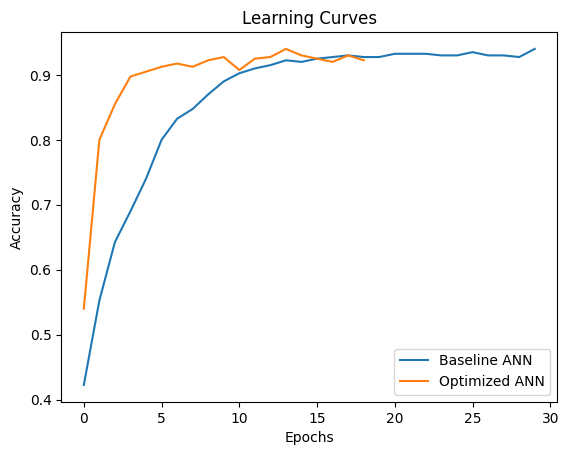

In [ ]:
# Learning Curves
plt.plot(history_base.history['val_accuracy'], label = 'Baseline ANN')
plt.plot(history_opt.history['val_accuracy'], label = 'Optimized ANN')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluation on testing data
y_val_pred = model_opt.predict(X_val)
y_pred = np.argmax(y_val_pred,axis=1)
print('Accuracy Score :', np.round(accuracy_score(y_val,y_pred),3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy Score : 0.94


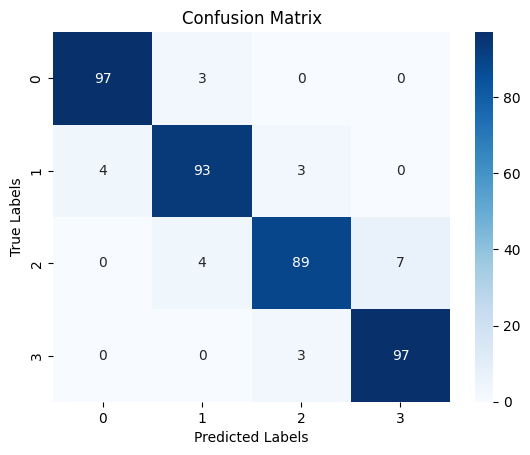

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd',
            xticklabels = [0, 1, 2, 3],
            yticklabels = [0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prediction on test data
test_predictions = model_opt.predict(X_scaled_final)
test_predictions = np.argmax(test_predictions,axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Creating the submission
submission = test_df.copy()
submission['price_range'] = test_predictions
submission.to_csv('submission.csv',index=False)

In [ ]:
# Saving the model in pickle file format
import pickle
with open('dl_class_model.pkl', 'wb') as file:
    pickle.dump(history_opt, file)